In [36]:
import sympy as sp

# 定义符号变量
x, y = sp.symbols('x y')

f = x ** 2 + y ** 2

sp.diff(f, x) + sp.diff(f,y)

2*x + 2*y

In [37]:
import sympy as sp

# 定义符号变量
x, y = sp.symbols('x y')

# 定义函数 f(x, y)
f = 3 * x**2 + y**2

# 计算 f 关于 x 的偏导数
f_x = sp.diff(f, x)

# 计算 f 关于 y 的偏导数
f_y = sp.diff(f, y)

# 输出偏导数
print(f"f 关于 x 的偏导数: {f_x}")
print(f"f 关于 y 的偏导数: {f_y}")

# 将偏导数组合成梯度向量
gradient = sp.Matrix([f_x, f_y])
print(f"梯度向量: {gradient}")

# 可以进一步计算特定点的梯度
point = {x: 1, y: 2}
gradient_at_point = gradient.subs(point)
print(f"在点 (1, 2) 处的梯度: {gradient_at_point}")

f 关于 x 的偏导数: 6*x
f 关于 y 的偏导数: 2*y
梯度向量: Matrix([[6*x], [2*y]])
在点 (1, 2) 处的梯度: Matrix([[6], [4]])


In [39]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 定义符号变量
x, y = sp.symbols('x y')

# 定义函数 f(x, y)
f = 3 * x**2 + y**2

# 计算 f 关于 x 和 y 的偏导数
f_x = sp.diff(f, x)
f_y = sp.diff(f, y)

# 将偏导数转换为可以计算的 Python 函数
f_x_func = sp.lambdify((x, y), f_x, "numpy")
f_y_func = sp.lambdify((x, y), f_y, "numpy")

# 梯度下降法参数
learning_rate = 0.1  # 学习率
max_iterations = 100  # 最大迭代次数
tolerance = 1e-6       # 收敛阈值

# 初始化变量
x_current, y_current = 2.0, 3.0  # 初始点 (2, 3)

# 保存迭代过程中的点
points = [(x_current, y_current)]

# 开始梯度下降迭代
for i in range(max_iterations):
    # 计算当前点的梯度
    grad_x = f_x_func(x_current, y_current)
    grad_y = f_y_func(x_current, y_current)

    # 更新变量
    x_new = x_current - learning_rate * grad_x
    y_new = y_current - learning_rate * grad_y

    # 检查收敛条件
    if np.sqrt((x_new - x_current)**2 + (y_new - y_current)**2) < tolerance:
        print(f"收敛在第 {i+1} 次迭代")
        break

    # 更新当前点
    x_current, y_current = x_new, y_new
    points.append((x_current, y_current))

# 输出优化结果
print(f"优化后的点: (x, y) = ({x_current}, {y_current})")
print(f"优化后的函数值: f(x, y) = {3 * x_current**2 + y_current**2}")

# 将点转换为 numpy 数组
points = np.array(points)

# 绘制函数的等高线图
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 3 * X**2 + Y**2

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=30, colors='black', linestyles='dashed')
plt.clabel(contour, inline=True, fontsize=8)
plt.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis', alpha=0.5)

# 绘制梯度下降路径
plt.plot(points[:, 0], points[:, 1], 'r-o', label='Gradient Descent Path')
plt.plot(points[-1, 0], points[-1, 1], 'bo', label='Convergence Point')

# 设置图例和标签
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gradient Descent Optimization')
plt.colorbar(label='f(x, y)')
plt.show()

KeyboardInterrupt: 

收敛在第 61 次迭代
优化后的点: (x, y) = (2.6584559915698148e-24, 4.59748662259767e-06)
优化后的函数值: f(x, y) = 2.113688324496453e-11


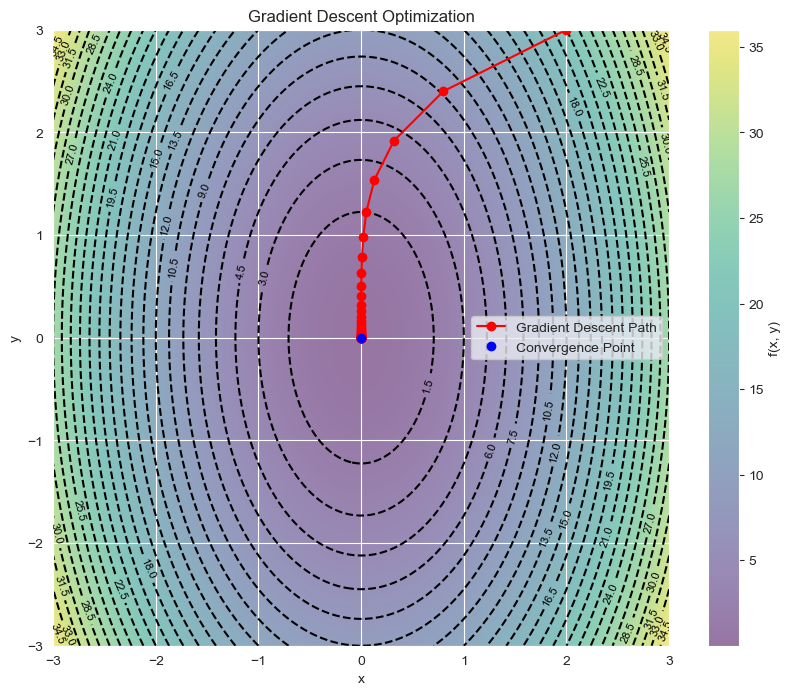

In [41]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 定义符号变量
x, y = sp.symbols('x y')

# 定义函数 f(x, y)
f = 3 * x**2 + y**2

# 计算 f 关于 x 和 y 的偏导数
f_x = sp.diff(f, x)
f_y = sp.diff(f, y)

# 将偏导数转换为可以计算的 Python 函数
f_x_func = sp.lambdify((x, y), f_x, "numpy")
f_y_func = sp.lambdify((x, y), f_y, "numpy")

# 梯度下降法参数
learning_rate = 0.1  # 学习率
max_iterations = 100  # 最大迭代次数
tolerance = 1e-6       # 收敛阈值

# 初始化变量
x_current, y_current = 2.0, 3.0  # 初始点 (2, 3)

# 保存迭代过程中的点
points = [(x_current, y_current)]

# 开始梯度下降迭代
for i in range(max_iterations):
    # 计算当前点的梯度
    grad_x = f_x_func(x_current, y_current)
    grad_y = f_y_func(x_current, y_current)

    # 更新变量
    x_new = x_current - learning_rate * grad_x
    y_new = y_current - learning_rate * grad_y

    # 检查收敛条件
    if np.sqrt((x_new - x_current)**2 + (y_new - y_current)**2) < tolerance:
        print(f"收敛在第 {i+1} 次迭代")
        break

    # 更新当前点
    x_current, y_current = x_new, y_new
    points.append((x_current, y_current))

# 输出优化结果
print(f"优化后的点: (x, y) = ({x_current}, {y_current})")
print(f"优化后的函数值: f(x, y) = {3 * x_current**2 + y_current**2}")

# 将点转换为 numpy 数组
points = np.array(points)

# 绘制函数的等高线图
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 3 * X**2 + Y**2

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=30, colors='black', linestyles='dashed')
plt.clabel(contour, inline=True, fontsize=8)
plt.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis', alpha=0.5)

# 绘制梯度下降路径
plt.plot(points[:, 0], points[:, 1], 'r-o', label='Gradient Descent Path')
plt.plot(points[-1, 0], points[-1, 1], 'bo', label='Convergence Point')

# 设置图例和标签
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gradient Descent Optimization')
plt.colorbar(label='f(x, y)')
plt.show()

In [45]:
import sympy as sp
import scipy
# 定义符号变量
x = sp.symbols('x')

# 定义函数 f(x) = x^2
f = x**2

# 定义积分区间
a = 0  # 积分下限
b = 10 # 积分上限

# 计算定积分
area = sp.integrate(f, (x, a, b))

# 输出结果
print(f"曲线 f(x) = {f} 在 x = {a} 和 x = {b} 之间的面积为: {area}")

曲线 f(x) = x**2 在 x = 0 和 x = 10 之间的面积为: 1000/3


In [52]:
import scipy.integrate as integrate
import numpy as np

def int(x,y):
    return np.exp(-x**2 - y**2)

x_1 =0
# 计算定积分
result, error = integrate.quad(f, a, b)

# 输出结果
print(f"定积分的结果是: {result}")
print(f"估计的绝对误差是: {error}")

定积分的结果是: 0.33333333333333337
估计的绝对误差是: 3.700743415417189e-15


In [56]:
import scipy.integrate as integrate
import numpy as np

def integrand(y, x):
    return np.exp(-x**2 - y**2)

xa = 0
xb = 10

# 定义 y 的积分下限和上限，作为 x 的函数
def ya(x):
    return 0

def yb(x):
    return 10

# 计算二重积分
result, error = integrate.dblquad(integrand, xa, xb, ya, yb)

print(f"二重积分的结果是: {result}")
print(f"估计的绝对误差是: {error}")

二重积分的结果是: 0.7853981633974476
估计的绝对误差是: 1.3753098510218537e-08
